In [1]:
import csv
from scipy.stats import mode, spearmanr
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
import pandas as pd

In [8]:
df = pd.read_csv('similarities/combined_no_london.csv') #USER TEXT SENT

In [9]:
#Text User
print "TEXT vs USER"
print spearmanr(df['TEXT'],df['USER'])
print "TEXT vs SENT"
print spearmanr(df['TEXT'],df['SENT'])
print "USER vs SENT"
print spearmanr(df['USER'],df['SENT'])



TEXT vs USER
SpearmanrResult(correlation=0.42676962676962676, pvalue=0.009439280729464792)
TEXT vs SENT
SpearmanrResult(correlation=0.6298584298584299, pvalue=3.85270901695852e-05)
USER vs SENT
SpearmanrResult(correlation=0.4517374517374517, pvalue=0.005680202061046634)


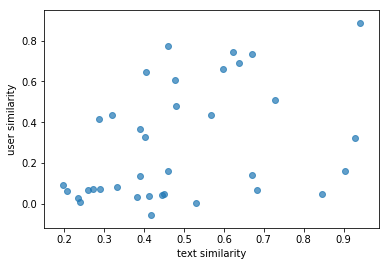

In [16]:
plt.scatter(df['TEXT'], df['USER'],alpha=0.7)
plt.xlabel('text similarity')
plt.ylabel('user similarity')
plt.show()

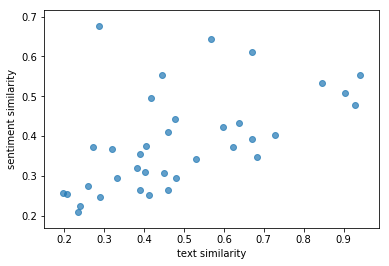

In [17]:
plt.scatter(df['TEXT'], df['SENT'],alpha=0.7)
plt.xlabel('text similarity')
plt.ylabel('sentiment similarity')
plt.show()

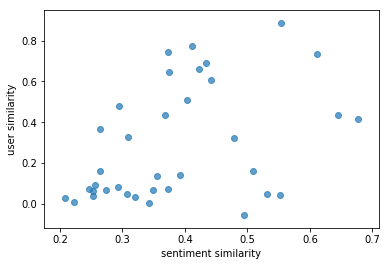

In [18]:
plt.scatter(df['SENT'], df['USER'],alpha=0.7)
plt.xlabel('sentiment similarity')
plt.ylabel('user similarity')
plt.show()

In [5]:
import glob
import os

lexicon_files = glob.glob('socialsent_lexicons_ppmi_svd_top5000/*.txt')

In [41]:
def normalize_lexicon(f):
    sent_dict = {}
    scaled_sent_dict = {}
    with open(f,'r') as f:
        tsvin = csv.reader(f,delimiter='\t')
        for line in tsvin:
            sent_dict[line[0]] = float(line[1])
    words_ordered = sorted(sent_dict.keys())
    sents_ordered = [sent_dict[w] for w in words_ordered]
    sents_ordered_norm = preprocessing.scale(sents_ordered)

    for i in range(len(words_ordered)):
        w = words_ordered[i]
        scaled_sent_dict[w] = float(sents_ordered_norm[i])
    return scaled_sent_dict

In [49]:
def get_sentiments(word):
    x = []
    for f in lexicon_files:
        subreddit = os.path.basename(f)[:-4]
        scaled_sent_dict = normalize_lexicon(f)
        if word in scaled_sent_dict:
            x.append((scaled_sent_dict[word],subreddit))
    for elem in sorted(x,reverse=True):
        print elem
    return x

In [50]:
get_sentiments('cute')

(3.124067931138336, 'femalefashionadvice')
(3.1093152736088885, 'xxfitness')
(2.7592259021495735, 'askwomen')
(2.580427550780781, 'actuallesbians')
(2.476668823978308, 'askmen')
(2.384723094316671, 'askgaybros')
(1.7868368514867194, 'malefashionadvice')
(1.7702725873116825, 'trollxchromosomes')
(1.7570752035954156, 'mensrights')
(-0.019807003763082098, 'london')


In [51]:
get_sentiments('women')

(0.6356754605075572, 'malefashionadvice')
(0.37103126465742015, 'xxfitness')
(0.3528587216118132, 'askgaybros')
(0.24876713409156756, 'femalefashionadvice')
(-0.16032303110658672, 'trollxchromosomes')
(-0.17447768796816646, 'actuallesbians')
(-0.29402104105870996, 'askmen')
(-0.4017470438520445, 'askwomen')
(-0.651250947782725, 'london')
(-0.7255974127914688, 'mensrights')


In [74]:
get_sentiments('feminists')

(0.09908012724247738, 'askmen')
(-0.19873284422426785, 'trollxchromosomes')
(-0.2827616704438157, 'askwomen')
(-2.18073697729723, 'actuallesbians')
(-2.434560146916325, 'mensrights')


In [69]:
get_sentiments('ladies')

(2.5872423172558494, 'mensrights')
(1.8938465643982412, 'trollxchromosomes')
(1.6279230841584653, 'actuallesbians')
(1.5435805506151712, 'xxfitness')
(0.9401412166728735, 'femalefashionadvice')
(0.5936212853089565, 'malefashionadvice')
(0.3623513533780337, 'askgaybros')
(-0.29871962041350797, 'london')
(-0.39413230708001307, 'askmen')
(-0.5029770806815019, 'askwomen')


In [75]:
get_sentiments('cute')

(3.124067931138336, 'femalefashionadvice')
(3.1093152736088885, 'xxfitness')
(2.7592259021495735, 'askwomen')
(2.580427550780781, 'actuallesbians')
(2.476668823978308, 'askmen')
(2.384723094316671, 'askgaybros')
(1.7868368514867194, 'malefashionadvice')
(1.7702725873116825, 'trollxchromosomes')
(1.7570752035954156, 'mensrights')
(-0.019807003763082098, 'london')


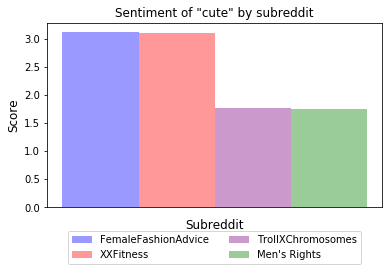

In [134]:
n_groups = 1
#femalefashioadvice,xxfitness,trollxchromosomes,mensrights

ffa = (3.124067931138336)
xx = (3.1093152736088885)
troll = (1.7702725873116825)
men = (1.7570752035954156)

# means_men = (20, 35, 30, 35, 27)
# std_men = (2, 3, 4, 1, 2)

# means_women = (25, 32, 34, 20, 25)
# std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.24) # <-- Change the 0.02 to work for your plot.

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, ffa, bar_width,
                alpha=opacity, color='b',
                
                label='FemaleFashionAdvice')

rects2 = ax.bar(index + bar_width, xx, bar_width,
                alpha=opacity, color='r',

                label='XXFitness')

rects2 = ax.bar(index + 2*bar_width, troll, bar_width,
                alpha=opacity, color='purple',
                
                label='TrollXChromosomes')

rects2 = ax.bar(index + 3*bar_width, men, bar_width,
                alpha=opacity, color='g',
                
                label='Men\'s Rights')

ax.set_xlabel('Subreddit',fontsize=12)
ax.set_ylabel('Score',fontsize=12)
ax.set_title('Sentiment of "cute" by subreddit')
#ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(())
ax.xaxis.set_ticks_position('none') 

ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2,fontsize=10)

#fig.tight_layout()
plt.savefig('sentiment_cute.pdf')
plt.show()


In [108]:
get_sentiments('ladies')

(2.5872423172558494, 'mensrights')
(1.8938465643982412, 'trollxchromosomes')
(1.6279230841584653, 'actuallesbians')
(1.5435805506151712, 'xxfitness')
(0.9401412166728735, 'femalefashionadvice')
(0.5936212853089565, 'malefashionadvice')
(0.3623513533780337, 'askgaybros')
(-0.29871962041350797, 'london')
(-0.39413230708001307, 'askmen')
(-0.5029770806815019, 'askwomen')


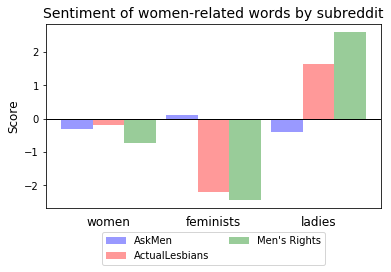

In [130]:
n_groups = 3
#femalefashioadvice,xxfitness,trollxchromosomes,mensrights

askmen = (-0.29402104105870996,0.09908012724247738,-0.39413230708001307)
act = (-0.17447768796816646,-2.18073697729723,1.6279230841584653)
men = (-0.7255974127914688,-2.434560146916325,2.5872423172558494)


fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.24) # <-- Change the 0.02 to work for your plot.

index = np.arange(n_groups)
bar_width = 0.3

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, askmen, bar_width,
                alpha=opacity, color='b',
                label='AskMen')

rects2 = ax.bar(index + bar_width, act, bar_width,
                alpha=opacity, color='r',

                label='ActualLesbians')

rects3 = ax.bar(index + 2*bar_width, men, bar_width,
                alpha=opacity, color='g',
                
                label="Men\'s Rights")


#ax.set_xlabel('Subreddit')
ax.axhline(0, color='black',lw=1)

ax.set_ylabel('Score',fontsize=12)
ax.set_title('Sentiment of women-related words by subreddit',fontsize=14)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('women','feminists','ladies'),fontsize=12)
ax.xaxis.set_ticks_position('none') 

ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2,fontsize=10)

#fig.tight_layout()
plt.savefig('sentiment_women.pdf')
plt.show()
